In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [3]:
(x_train,y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()


In [4]:
x_train = x_train/ 255
x_test = x_test/ 255

In [5]:

print("x_train and x_test Shape before flatten:")

print(x_train.shape)
print(x_test.shape)

#flatten x_train and x_test
x_train_flattened = x_train.reshape(len(x_train), 28 * 28)
x_test_flattened = x_test.reshape(len(x_test),28 * 28)



print("\nx_train and x_test Shape after flatten:")
print(x_train_flattened.shape)
print(x_test_flattened.shape)

x_train and x_test Shape before flatten:
(60000, 28, 28)
(10000, 28, 28)

x_train and x_test Shape after flatten:
(60000, 784)
(10000, 784)


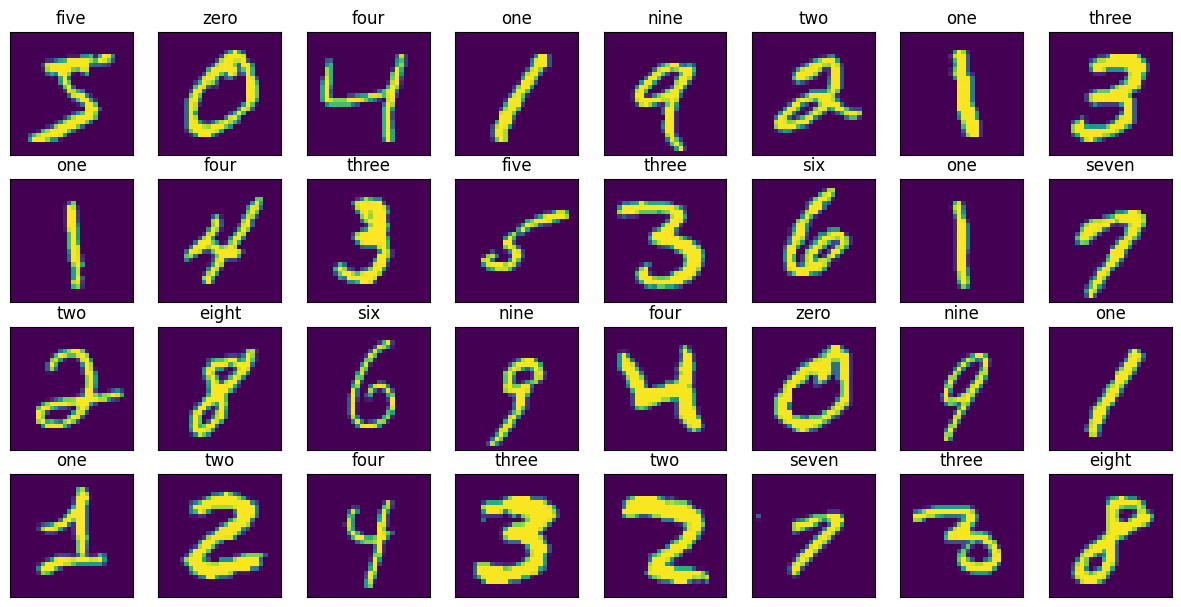

In [6]:
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

plt.figure(figsize=(15,15))

for i in range(32):
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(x_train[i])

    plt.title(class_names[y_train[i]], fontsize=12)

plt.show()

simple svm model:


In [7]:
from sklearn import svm
from sklearn.metrics import accuracy_score

x_train_svm = x_train_flattened[:10000]
y_train_svm = y_train[:10000]

svm_model = svm.SVC(kernel='linear')
svm_model.fit(x_train_svm, y_train_svm)

y_pred_svm = svm_model.predict(x_test_flattened)
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test Accuracy: {acc_svm:.4f}")

SVM Test Accuracy: 0.9170


simple Ann model:

In [50]:
AnnModel = keras.Sequential([
    keras.layers.Dense(500, input_shape=(784,) , activation="relu"),
    keras.layers.Dense(200,activation = "relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

AnnModel.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
AnnModel.summary()
AnnModel.fit(x_train_flattened,y_train,epochs=10,batch_size=32,shuffle=True)

test_loss, test_acc = AnnModel.evaluate(x_test_flattened, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_86 (Dense)                │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 494,710 (1.89 MB)

 Trainable params: 494,710 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7657 - loss: 0.9366
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9181 - loss: 0.2807
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9348 - loss: 0.2255
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9459 - loss: 0.1894
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9544 - loss: 0.1604
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9606 - loss: 0.1381
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9648 - loss: 0.1240
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9681 - loss: 0.1145
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9706 - loss: 0.1037
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9741 - loss: 0.0929
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9658 - loss: 0.1201

Test Accuracy: 0.9708999991416931
Test Loss

In [51]:
AnnModel_2 = keras.Sequential([
    keras.layers.Dense(500, input_shape=(784,) , activation="relu"),
    keras.layers.Dense(200,activation = "relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

AnnModel_2.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
AnnModel_2.summary()
AnnModel_2.fit(x_train_flattened,y_train,epochs=13,batch_size=32,shuffle=True)
test_loss, test_acc = AnnModel_2.evaluate(x_test_flattened, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_89 (Dense)                │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 494,710 (1.89 MB)

 Trainable params: 494,710 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7648 - loss: 0.9331
Epoch 2/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9178 - loss: 0.2868
Epoch 3/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9359 - loss: 0.2271
Epoch 4/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9456 - loss: 0.1899
Epoch 5/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9538 - loss: 0.1628
Epoch 6/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9587 - loss: 0.1458
Epoch 7/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9639 - loss: 0.1285
Epoch 8/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9674 - loss: 0.1164
Epoch 9/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9705 - loss: 0.1032
Epoch 10/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9738 - loss: 0.0977
Epoch 11/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9755 - loss: 0.0900
Epoch 12/13
1875/1875 ━━━━━━━━

In [52]:
AnnModel_3 = keras.Sequential([
    keras.layers.Dense(500, input_shape=(784,) , activation="relu"),
    keras.layers.Dense(200,activation = "relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

AnnModel_3.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
AnnModel_3.summary()
AnnModel_3.fit(x_train_flattened,y_train,epochs=15,batch_size=32,shuffle=True)
test_loss, test_acc = AnnModel_3.evaluate(x_test_flattened, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_92 (Dense)                │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 494,710 (1.89 MB)

 Trainable params: 494,710 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7521 - loss: 0.9500
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9152 - loss: 0.2916
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9350 - loss: 0.2274
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9461 - loss: 0.1933
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9535 - loss: 0.1638
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9590 - loss: 0.1447
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9661 - loss: 0.1226
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9673 - loss: 0.1129
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9716 - loss: 0.1018
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9742 - loss: 0.0926
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9767 - loss: 0.0845
Epoch 12/15
1875/1875 ━━━━━━━━

In [7]:
import time
from tensorflow.keras.callbacks import Callback

class TimingCallback(Callback):
    def on_train_begin(self, logs=None):
        self.train_times = []
        self.test_times = []

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_train_start = time.time()

    def on_epoch_end(self, epoch, logs=None):
        train_duration = time.time() - self.epoch_train_start
        self.train_times.append(train_duration)

    def on_test_begin(self, logs=None):
        self.epoch_test_start = time.time()

    def on_test_end(self, logs=None):
        test_duration = time.time() - self.epoch_test_start
        self.test_times.append(test_duration)

    def get_avg_times(self):
        avg_train = sum(self.train_times) / len(self.train_times)
        avg_test = sum(self.test_times) / len(self.test_times)
        return avg_train, avg_test

now we start with the CNN models:



testing different epochs:


In [9]:
timing = TimingCallback()
Optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

cnn_model = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8204 - loss: 0.5902 - val_accuracy: 0.9799 - val_loss: 0.0672
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9767 - loss: 0.0758 - val_accuracy: 0.9854 - val_loss: 0.0491
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9847 - loss: 0.0496 - val_accuracy: 0.9850 - val_loss: 0.0433
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9887 - loss: 0.0389 - val_accuracy: 0.9881 - val_loss: 0.0344
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9909 - loss: 0.0297 - val_accuracy: 0.9871 - val_loss: 0.0391
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9920 - loss: 0.0264 - val_accuracy: 0.9894 - val_loss: 0.0311
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9944 - loss: 0.0183 - val_accuracy: 0.9883 - val_loss: 0.0372
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9945 - loss: 0.0170 - val_accuracy: 0.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,070 (1.72 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 225,036 (879.05 KB)


Average training time per epoch: 4.0500 seconds
Average test time per epoch: 0.4084 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9887 - loss: 0.0382

Test Accuracy: 0.991599977016449
Test Loss:     0.028003646060824394


In [11]:
timing = TimingCallback()
Optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

cnn_model1 = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model1.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model1.fit(x_train, y_train, batch_size=64, epochs=13, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model1.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model1.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/13
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8033 - loss: 0.6057 - val_accuracy: 0.9765 - val_loss: 0.0728
Epoch 2/13
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9779 - loss: 0.0733 - val_accuracy: 0.9848 - val_loss: 0.0472
Epoch 3/13
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9844 - loss: 0.0496 - val_accuracy: 0.9793 - val_loss: 0.0609
Epoch 4/13
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9881 - loss: 0.0389 - val_accuracy: 0.9851 - val_loss: 0.0471
Epoch 5/13
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9895 - loss: 0.0339 - val_accuracy: 0.9873 - val_loss: 0.0369
Epoch 6/13
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9929 - loss: 0.0242 - val_accuracy: 0.9889 - val_loss: 0.0321
Epoch 7/13
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9935 - loss: 0.0208 - val_accuracy: 0.9886 - val_loss: 0.0330
Epoch 8/13
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9946 - loss: 0.0173 - val_accuracy: 0.

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,070 (1.72 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 225,036 (879.05 KB)


Average training time per epoch: 4.5766 seconds
Average test time per epoch: 0.3965 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9878 - loss: 0.0392

Test Accuracy: 0.9901999831199646
Test Loss:     0.031065966933965683


In [12]:
timing = TimingCallback()
Optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

cnn_model2 = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model2.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model2.fit(x_train, y_train, batch_size=64, epochs=15, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model2.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model2.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)


Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8136 - loss: 0.6323 - val_accuracy: 0.9756 - val_loss: 0.0760
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9777 - loss: 0.0715 - val_accuracy: 0.9855 - val_loss: 0.0477
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9856 - loss: 0.0490 - val_accuracy: 0.9875 - val_loss: 0.0393
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9888 - loss: 0.0357 - val_accuracy: 0.9859 - val_loss: 0.0449
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9908 - loss: 0.0285 - val_accuracy: 0.9893 - val_loss: 0.0346
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9926 - loss: 0.0234 - val_accuracy: 0.9878 - val_loss: 0.0356
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9939 - loss: 0.0190 - val_accuracy: 0.9885 - val_loss: 0.0386
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9945 - loss: 0.0175 - val_accuracy: 0.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,070 (1.72 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 225,036 (879.05 KB)


Average training time per epoch: 4.4922 seconds
Average test time per epoch: 0.3953 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9880 - loss: 0.0488

Test Accuracy: 0.9908000230789185
Test Loss:     0.033969637006521225


In [13]:
timing = TimingCallback()
Optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

cnn_model3 = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model3.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model3.fit(x_train, y_train, batch_size=64, epochs=14, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model3.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model3.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)



Epoch 1/14
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8121 - loss: 0.6204 - val_accuracy: 0.9761 - val_loss: 0.0732
Epoch 2/14
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9785 - loss: 0.0701 - val_accuracy: 0.9769 - val_loss: 0.0663
Epoch 3/14
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9851 - loss: 0.0476 - val_accuracy: 0.9801 - val_loss: 0.0585
Epoch 4/14
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9879 - loss: 0.0384 - val_accuracy: 0.9879 - val_loss: 0.0365
Epoch 5/14
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9903 - loss: 0.0297 - val_accuracy: 0.9862 - val_loss: 0.0391
Epoch 6/14
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9924 - loss: 0.0239 - val_accuracy: 0.9899 - val_loss: 0.0291
Epoch 7/14
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9944 - loss: 0.0192 - val_accuracy: 0.9907 - val_loss: 0.0279
Epoch 8/14
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9953 - loss: 0.0160 - val_accuracy: 0.

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,070 (1.72 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 225,036 (879.05 KB)


Average training time per epoch: 4.5059 seconds
Average test time per epoch: 0.4175 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9892 - loss: 0.0393

Test Accuracy: 0.9912999868392944
Test Loss:     0.030029235407710075


now testing different learning rates:


In [14]:
timing = TimingCallback()
Optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

cnn_model4 = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model4.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model4.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model4.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model4.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.5546 - loss: 1.5596 - val_accuracy: 0.9317 - val_loss: 0.2378
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9275 - loss: 0.2395 - val_accuracy: 0.9554 - val_loss: 0.1575
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9538 - loss: 0.1543 - val_accuracy: 0.9680 - val_loss: 0.1111
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9655 - loss: 0.1150 - val_accuracy: 0.9740 - val_loss: 0.0901
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9716 - loss: 0.0971 - val_accuracy: 0.9743 - val_loss: 0.0843
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9747 - loss: 0.0851 - val_accuracy: 0.9781 - val_loss: 0.0749
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9777 - loss: 0.0764 - val_accuracy: 0.9794 - val_loss: 0.0655
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9800 - loss: 0.0651 - val_accuracy: 0.

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,070 (1.72 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 225,036 (879.05 KB)


Average training time per epoch: 5.8419 seconds
Average test time per epoch: 0.5349 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9796 - loss: 0.0655

Test Accuracy: 0.9828000068664551
Test Loss:     0.05459830164909363


In [54]:
timing = TimingCallback()
Optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

cnn_model4 = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model4.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model4.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model4.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model4.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8084 - loss: 0.6007 - val_accuracy: 0.9777 - val_loss: 0.0663
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9781 - loss: 0.0707 - val_accuracy: 0.9852 - val_loss: 0.0462
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9854 - loss: 0.0479 - val_accuracy: 0.9881 - val_loss: 0.0382
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9881 - loss: 0.0369 - val_accuracy: 0.9868 - val_loss: 0.0372
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9915 - loss: 0.0277 - val_accuracy: 0.9890 - val_loss: 0.0337
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9927 - loss: 0.0234 - val_accuracy: 0.9900 - val_loss: 0.0322
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9939 - loss: 0.0211 - val_accuracy: 0.9892 - val_loss: 0.0314
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9946 - loss: 0.0164 - val_accuracy: 0.

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_83 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_83 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_84 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_84 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_42 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,070 (1.72 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 225,036 (879.05 KB)


Average training time per epoch: 4.1460 seconds
Average test time per epoch: 0.4296 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9837 - loss: 0.0520

Test Accuracy: 0.9884999990463257
Test Loss:     0.038313865661621094


In [19]:
timing = TimingCallback()
Optimizer = tf.keras.optimizers.SGD(learning_rate=0.025, momentum=0.9)

cnn_model5 = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model5.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model5.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model5.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model5.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)



Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8463 - loss: 0.4915 - val_accuracy: 0.9793 - val_loss: 0.0620
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9810 - loss: 0.0567 - val_accuracy: 0.9865 - val_loss: 0.0419
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9882 - loss: 0.0365 - val_accuracy: 0.9886 - val_loss: 0.0351
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9916 - loss: 0.0271 - val_accuracy: 0.9868 - val_loss: 0.0390
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9940 - loss: 0.0190 - val_accuracy: 0.9887 - val_loss: 0.0364
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9960 - loss: 0.0133 - val_accuracy: 0.9895 - val_loss: 0.0339
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9959 - loss: 0.0122 - val_accuracy: 0.9895 - val_loss: 0.0365
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9964 - loss: 0.0105 - val_accuracy: 0.

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,070 (1.72 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 225,036 (879.05 KB)


Average training time per epoch: 4.8062 seconds
Average test time per epoch: 0.4132 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9893 - loss: 0.0396

Test Accuracy: 0.9919000267982483
Test Loss:     0.0305021945387125


In [21]:
timing = TimingCallback()
Optimizer = tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.9)

cnn_model6 = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model6.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model6.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model6.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model6.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)



Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8724 - loss: 0.4006 - val_accuracy: 0.9788 - val_loss: 0.0680
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9881 - loss: 0.0403 - val_accuracy: 0.9874 - val_loss: 0.0383
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9904 - loss: 0.0300 - val_accuracy: 0.9886 - val_loss: 0.0351
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9931 - loss: 0.0235 - val_accuracy: 0.9857 - val_loss: 0.0426
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9949 - loss: 0.0169 - val_accuracy: 0.9898 - val_loss: 0.0345
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9961 - loss: 0.0116 - val_accuracy: 0.9865 - val_loss: 0.0507
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9963 - loss: 0.0116 - val_accuracy: 0.9913 - val_loss: 0.0323
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9973 - loss: 0.0070 - val_accuracy: 0.

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,070 (1.72 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 225,036 (879.05 KB)


Average training time per epoch: 4.7040 seconds
Average test time per epoch: 0.4160 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9865 - loss: 0.0540

Test Accuracy: 0.9886000156402588
Test Loss:     0.045368414372205734


now testing the number of layers:

In [22]:
# 1 x 2

timing = TimingCallback()
Optimizer = tf.keras.optimizers.SGD(learning_rate=0.025, momentum=0.9)

cnn_model7 = keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model7.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model7.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model7.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model7.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8548 - loss: 0.4647 - val_accuracy: 0.9757 - val_loss: 0.0759
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9772 - loss: 0.0758 - val_accuracy: 0.9828 - val_loss: 0.0528
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9859 - loss: 0.0463 - val_accuracy: 0.9851 - val_loss: 0.0511
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9902 - loss: 0.0319 - val_accuracy: 0.9832 - val_loss: 0.0524
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9924 - loss: 0.0235 - val_accuracy: 0.9858 - val_loss: 0.0422
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9944 - loss: 0.0171 - val_accuracy: 0.9869 - val_loss: 0.0398
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9962 - loss: 0.0127 - val_accuracy: 0.9867 - val_loss: 0.0461
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9970 - loss: 0.0096 - val_accuracy: 0.

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 694,294 (2.65 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 347,148 (1.32 MB)


Average training time per epoch: 5.0675 seconds
Average test time per epoch: 0.6567 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9837 - loss: 0.0578

Test Accuracy: 0.9868999719619751
Test Loss:     0.04753989353775978


In [23]:
# 2 x 3

timing = TimingCallback()
Optimizer = tf.keras.optimizers.SGD(learning_rate=0.025, momentum=0.9)

cnn_model8 = keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model8.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model8.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model8.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model8.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8306 - loss: 0.5336 - val_accuracy: 0.9720 - val_loss: 0.0859
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9829 - loss: 0.0535 - val_accuracy: 0.9881 - val_loss: 0.0365
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9892 - loss: 0.0332 - val_accuracy: 0.9868 - val_loss: 0.0397
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9915 - loss: 0.0256 - val_accuracy: 0.9883 - val_loss: 0.0338
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9944 - loss: 0.0173 - val_accuracy: 0.9862 - val_loss: 0.0453
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9962 - loss: 0.0124 - val_accuracy: 0.9902 - val_loss: 0.0346
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9964 - loss: 0.0116 - val_accuracy: 0.9912 - val_loss: 0.0279
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9973 - loss: 0.0074 - val_accuracy: 0.

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 925,718 (3.53 MB)

 Trainable params: 462,858 (1.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 462,860 (1.77 MB)


Average training time per epoch: 4.9465 seconds
Average test time per epoch: 0.4799 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9876 - loss: 0.0469

Test Accuracy: 0.9909999966621399
Test Loss:     0.0356762558221817


In [24]:
# 3 x 3

timing = TimingCallback()
Optimizer = tf.keras.optimizers.SGD(learning_rate=0.025, momentum=0.9)

cnn_model9 = keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model9.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model9.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model9.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model9.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)



Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7635 - loss: 0.7103 - val_accuracy: 0.9788 - val_loss: 0.0699
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9769 - loss: 0.0744 - val_accuracy: 0.9749 - val_loss: 0.0852
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9849 - loss: 0.0488 - val_accuracy: 0.9863 - val_loss: 0.0486
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9881 - loss: 0.0391 - val_accuracy: 0.9868 - val_loss: 0.0482
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9904 - loss: 0.0294 - val_accuracy: 0.9809 - val_loss: 0.0681
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9919 - loss: 0.0249 - val_accuracy: 0.9846 - val_loss: 0.0541
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9937 - loss: 0.0184 - val_accuracy: 0.9874 - val_loss: 0.0445
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9953 - loss: 0.0144 - val_accuracy: 0.

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_31 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,766 (1.22 MB)

 Trainable params: 159,882 (624.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 159,884 (624.55 KB)


Average training time per epoch: 4.6488 seconds
Average test time per epoch: 0.4844 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9834 - loss: 0.0739

Test Accuracy: 0.9865000247955322
Test Loss:     0.057494573295116425


In [25]:
# 1 x 4

timing = TimingCallback()
Optimizer = tf.keras.optimizers.SGD(learning_rate=0.025, momentum=0.9)

cnn_model10 = keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model10.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model10.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model10.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model10.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)



Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8166 - loss: 0.5627 - val_accuracy: 0.9762 - val_loss: 0.0751
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9761 - loss: 0.0761 - val_accuracy: 0.9775 - val_loss: 0.0701
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9852 - loss: 0.0479 - val_accuracy: 0.9846 - val_loss: 0.0499
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9892 - loss: 0.0335 - val_accuracy: 0.9860 - val_loss: 0.0452
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9931 - loss: 0.0213 - val_accuracy: 0.9853 - val_loss: 0.0466
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9942 - loss: 0.0182 - val_accuracy: 0.9853 - val_loss: 0.0503
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9954 - loss: 0.0152 - val_accuracy: 0.9840 - val_loss: 0.0543
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9964 - loss: 0.0111 - val_accuracy: 0.

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 727,446 (2.77 MB)

 Trainable params: 363,722 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 363,724 (1.39 MB)


Average training time per epoch: 4.3733 seconds
Average test time per epoch: 0.4346 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9811 - loss: 0.0800

Test Accuracy: 0.9843000173568726
Test Loss:     0.0601922869682312


**now testing diferent batch sizes:**

In [26]:
# 32 batch size

timing = TimingCallback()
Optimizer = tf.keras.optimizers.SGD(learning_rate=0.025, momentum=0.9)

cnn_model11 = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model11.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model11.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model11.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model11.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8952 - loss: 0.3329 - val_accuracy: 0.9838 - val_loss: 0.0494
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9860 - loss: 0.0455 - val_accuracy: 0.9875 - val_loss: 0.0385
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9898 - loss: 0.0308 - val_accuracy: 0.9887 - val_loss: 0.0344
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9938 - loss: 0.0198 - val_accuracy: 0.9908 - val_loss: 0.0317
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9959 - loss: 0.0137 - val_accuracy: 0.9903 - val_loss: 0.0301
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9961 - loss: 0.0130 - val_accuracy: 0.9904 - val_loss: 0.0334
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9977 - loss: 0.0076 - val_accuracy: 0.9916 - val_loss: 0.0290
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9974 - loss: 0.007

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,070 (1.72 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 225,036 (879.05 KB)


Average training time per epoch: 9.3442 seconds
Average test time per epoch: 0.9228 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9884 - loss: 0.0496

Test Accuracy: 0.9919999837875366
Test Loss:     0.03732578828930855


In [27]:
# 2 * 64 = 128 batch size

timing = TimingCallback()
Optimizer = tf.keras.optimizers.SGD(learning_rate=0.025, momentum=0.9)

cnn_model12 = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model12.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model12.fit(x_train, y_train, batch_size=128, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model12.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model12.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7930 - loss: 0.6339 - val_accuracy: 0.9779 - val_loss: 0.0709
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9793 - loss: 0.0669 - val_accuracy: 0.9800 - val_loss: 0.0622
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9858 - loss: 0.0467 - val_accuracy: 0.9886 - val_loss: 0.0358
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9898 - loss: 0.0338 - val_accuracy: 0.9877 - val_loss: 0.0374
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9925 - loss: 0.0250 - val_accuracy: 0.9894 - val_loss: 0.0303
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9936 - loss: 0.0210 - val_accuracy: 0.9901 - val_loss: 0.0291
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9949 - loss: 0.0161 - val_accuracy: 0.9891 - val_loss: 0.0324
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9958 - loss: 0.0147 - val_accuracy: 0.

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,070 (1.72 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 225,036 (879.05 KB)


Average training time per epoch: 2.8263 seconds
Average test time per epoch: 0.2770 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9869 - loss: 0.0416

Test Accuracy: 0.9894000291824341
Test Loss:     0.03383175656199455


In [28]:
# 3 * 64 = 192 batch size

timing = TimingCallback()
Optimizer = tf.keras.optimizers.SGD(learning_rate=0.025, momentum=0.9)

cnn_model13 = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model13.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model13.fit(x_train, y_train, batch_size=192, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model13.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model13.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)



Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7443 - loss: 0.8158 - val_accuracy: 0.9702 - val_loss: 0.0919
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9742 - loss: 0.0805 - val_accuracy: 0.9821 - val_loss: 0.0562
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9823 - loss: 0.0556 - val_accuracy: 0.9862 - val_loss: 0.0429
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9873 - loss: 0.0416 - val_accuracy: 0.9854 - val_loss: 0.0477
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9891 - loss: 0.0352 - val_accuracy: 0.9877 - val_loss: 0.0407
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9904 - loss: 0.0306 - val_accuracy: 0.9888 - val_loss: 0.0363
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9922 - loss: 0.0249 - val_accuracy: 0.9889 - val_loss: 0.0351
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9935 - loss: 0.0207 - val_accuracy: 0

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,070 (1.72 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 225,036 (879.05 KB)


Average training time per epoch: 2.5073 seconds
Average test time per epoch: 0.2272 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9875 - loss: 0.0390

Test Accuracy: 0.9901000261306763
Test Loss:     0.031059537082910538


In [29]:
# To be sure that it is the best model till now

timing = TimingCallback()
Optimizer = tf.keras.optimizers.SGD(learning_rate=0.025, momentum=0.9)

test_model = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

test_model.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

test_model.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
test_model.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = test_model.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)



Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8474 - loss: 0.4771 - val_accuracy: 0.9775 - val_loss: 0.0683
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9839 - loss: 0.0504 - val_accuracy: 0.9880 - val_loss: 0.0352
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9903 - loss: 0.0331 - val_accuracy: 0.9893 - val_loss: 0.0312
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9932 - loss: 0.0230 - val_accuracy: 0.9901 - val_loss: 0.0269
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9942 - loss: 0.0198 - val_accuracy: 0.9898 - val_loss: 0.0310
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9946 - loss: 0.0153 - val_accuracy: 0.9882 - val_loss: 0.0375
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9964 - loss: 0.0118 - val_accuracy: 0.9904 - val_loss: 0.0328
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9973 - loss: 0.0090 - val_accuracy: 0.

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_41 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,070 (1.72 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 225,036 (879.05 KB)


Average training time per epoch: 3.9640 seconds
Average test time per epoch: 0.4208 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9877 - loss: 0.0492

Test Accuracy: 0.9908999800682068
Test Loss:     0.035281550139188766


Now we will test different activation functions

In [30]:
# Sigmoid

timing = TimingCallback()
Optimizer = tf.keras.optimizers.SGD(learning_rate=0.025, momentum=0.9)

cnn_model14 = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='sigmoid', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='sigmoid'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model14.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model14.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model14.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model14.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1070 - loss: 2.3201 - val_accuracy: 0.0974 - val_loss: 2.2995
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2815 - loss: 1.9644 - val_accuracy: 0.9058 - val_loss: 0.3168
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9178 - loss: 0.2717 - val_accuracy: 0.9561 - val_loss: 0.1553
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9538 - loss: 0.1544 - val_accuracy: 0.9641 - val_loss: 0.1174
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9659 - loss: 0.1127 - val_accuracy: 0.9720 - val_loss: 0.0900
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9715 - loss: 0.0917 - val_accuracy: 0.9763 - val_loss: 0.0774
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9763 - loss: 0.0770 - val_accuracy: 0.9762 - val_loss: 0.0751
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9780 - loss: 0.0714 - val_accuracy: 0.

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_43 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,070 (1.72 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 225,036 (879.05 KB)


Average training time per epoch: 5.3664 seconds
Average test time per epoch: 0.5262 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9779 - loss: 0.0707

Test Accuracy: 0.9814000129699707
Test Loss:     0.05916299298405647


In [35]:
# Tanh

timing = TimingCallback()
Optimizer = tf.keras.optimizers.SGD(learning_rate=0.025, momentum=0.9)

cnn_model15 = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='tanh', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model15.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model15.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model15.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model15.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)



Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8790 - loss: 0.3813 - val_accuracy: 0.9838 - val_loss: 0.0505
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9837 - loss: 0.0547 - val_accuracy: 0.9889 - val_loss: 0.0376
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9906 - loss: 0.0326 - val_accuracy: 0.9890 - val_loss: 0.0333
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9922 - loss: 0.0241 - val_accuracy: 0.9899 - val_loss: 0.0316
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9951 - loss: 0.0165 - val_accuracy: 0.9910 - val_loss: 0.0301
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9967 - loss: 0.0119 - val_accuracy: 0.9907 - val_loss: 0.0287
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9989 - loss: 0.0066 - val_accuracy: 0.9923 - val_loss: 0.0270
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9989 - loss: 0.0058 - val_accuracy: 0.

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_53 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_27 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,070 (1.72 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 225,036 (879.05 KB)


Average training time per epoch: 5.1963 seconds
Average test time per epoch: 0.4300 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9900 - loss: 0.0333

Test Accuracy: 0.9919999837875366
Test Loss:     0.025324709713459015


In [36]:
# SeLu

timing = TimingCallback()
Optimizer = tf.keras.optimizers.SGD(learning_rate=0.025, momentum=0.9)

cnn_model16 = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='selu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='selu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='selu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model16.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model16.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model16.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model16.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)



Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8926 - loss: 0.3291 - val_accuracy: 0.9812 - val_loss: 0.0561
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9849 - loss: 0.0511 - val_accuracy: 0.9838 - val_loss: 0.0501
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9901 - loss: 0.0325 - val_accuracy: 0.9861 - val_loss: 0.0431
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9938 - loss: 0.0210 - val_accuracy: 0.9857 - val_loss: 0.0498
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9949 - loss: 0.0156 - val_accuracy: 0.9880 - val_loss: 0.0440
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9962 - loss: 0.0118 - val_accuracy: 0.9886 - val_loss: 0.0434
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9978 - loss: 0.0070 - val_accuracy: 0.9888 - val_loss: 0.0475
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9977 - loss: 0.0068 - val_accuracy: 0.

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_55 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_28 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,070 (1.72 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 225,036 (879.05 KB)


Average training time per epoch: 4.8294 seconds
Average test time per epoch: 0.4438 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9878 - loss: 0.0622

Test Accuracy: 0.9904000163078308
Test Loss:     0.047927744686603546


Now we will test different optimizers

In [42]:
# Adam

timing = TimingCallback()
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.025)

cnn_model17 = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model17.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model17.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model17.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model17.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)



Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8709 - loss: 0.4197 - val_accuracy: 0.9594 - val_loss: 0.1527
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9614 - loss: 0.1402 - val_accuracy: 0.9639 - val_loss: 0.1236
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9663 - loss: 0.1265 - val_accuracy: 0.9759 - val_loss: 0.0929
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9680 - loss: 0.1228 - val_accuracy: 0.9651 - val_loss: 0.1444
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9651 - loss: 0.1396 - val_accuracy: 0.9654 - val_loss: 0.1464
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9722 - loss: 0.1145 - val_accuracy: 0.9648 - val_loss: 0.1578
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9705 - loss: 0.1236 - val_accuracy: 0.9636 - val_loss: 0.1810
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9699 - loss: 0.1306 - val_accuracy: 0.

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_67 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_67 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_68 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_34 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)


Average training time per epoch: 4.4061 seconds
Average test time per epoch: 0.4718 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9534 - loss: 0.2646

Test Accuracy: 0.9613000154495239
Test Loss:     0.21072505414485931


In [38]:
# Lion

timing = TimingCallback()
Optimizer = tf.keras.optimizers.Lion(learning_rate=0.025)

cnn_model18 = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model18.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model18.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model18.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model18.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1075 - loss: 2.3606 - val_accuracy: 0.1009 - val_loss: 2.3068
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1061 - loss: 2.3064 - val_accuracy: 0.0980 - val_loss: 2.3075
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1081 - loss: 2.3068 - val_accuracy: 0.1135 - val_loss: 2.3070
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1026 - loss: 2.3074 - val_accuracy: 0.0980 - val_loss: 2.3074
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1030 - loss: 2.3075 - val_accuracy: 0.0958 - val_loss: 2.3055
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1046 - loss: 2.3074 - val_accuracy: 0.0982 - val_loss: 2.3105
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1077 - loss: 2.3060 - val_accuracy: 0.1135 - val_loss: 2.3066
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1053 - loss: 2.3069 - val_accuracy: 0.

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_59 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_30 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,070 (1.72 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 225,036 (879.05 KB)


Average training time per epoch: 4.1387 seconds
Average test time per epoch: 0.3998 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0941 - loss: 2.3077

Test Accuracy: 0.09740000218153
Test Loss:     2.3072900772094727


In [40]:
# AdamW

timing = TimingCallback()
Optimizer = tf.keras.optimizers.AdamW(learning_rate=0.025)

cnn_model19 = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model19.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model19.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model19.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model19.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)



Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8375 - loss: 0.5026 - val_accuracy: 0.9608 - val_loss: 0.1363
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9614 - loss: 0.1283 - val_accuracy: 0.9686 - val_loss: 0.1124
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9670 - loss: 0.1145 - val_accuracy: 0.9698 - val_loss: 0.1006
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9678 - loss: 0.1171 - val_accuracy: 0.9657 - val_loss: 0.1171
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9718 - loss: 0.1030 - val_accuracy: 0.9624 - val_loss: 0.1306
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9690 - loss: 0.1154 - val_accuracy: 0.9661 - val_loss: 0.1129
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9681 - loss: 0.1196 - val_accuracy: 0.9621 - val_loss: 0.1428
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9679 - loss: 0.1161 - val_accuracy: 0.

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_63 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_32 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)


Average training time per epoch: 4.4532 seconds
Average test time per epoch: 0.4097 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9618 - loss: 0.1508

Test Accuracy: 0.9700000286102295
Test Loss:     0.11946484446525574


Now we will test with adding a dropout layer

In [44]:
# best model

timing = TimingCallback()
Optimizer = tf.keras.optimizers.SGD(learning_rate=0.025, momentum=0.9)

cnn_model20 = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model20.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model20.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model20.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model20.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)



Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7976 - loss: 0.6116 - val_accuracy: 0.9821 - val_loss: 0.0628
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9712 - loss: 0.0988 - val_accuracy: 0.9880 - val_loss: 0.0364
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9786 - loss: 0.0716 - val_accuracy: 0.9879 - val_loss: 0.0351
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9832 - loss: 0.0558 - val_accuracy: 0.9886 - val_loss: 0.0323
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9865 - loss: 0.0449 - val_accuracy: 0.9918 - val_loss: 0.0281
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9880 - loss: 0.0401 - val_accuracy: 0.9913 - val_loss: 0.0265
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9896 - loss: 0.0338 - val_accuracy: 0.9918 - val_loss: 0.0231
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9900 - loss: 0.0296 - val_accuracy: 0.

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_71 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_71 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_72 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_36 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,070 (1.72 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 225,036 (879.05 KB)


Average training time per epoch: 4.3206 seconds
Average test time per epoch: 0.4389 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9904 - loss: 0.0278

Test Accuracy: 0.9921000003814697
Test Loss:     0.0228414349257946


In [45]:
timing = TimingCallback()
Optimizer = tf.keras.optimizers.SGD(learning_rate=0.025, momentum=0.9)

cnn_model21 = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model21.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model21.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model21.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model21.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8153 - loss: 0.5454 - val_accuracy: 0.9800 - val_loss: 0.0587
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9754 - loss: 0.0789 - val_accuracy: 0.9874 - val_loss: 0.0391
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9801 - loss: 0.0622 - val_accuracy: 0.9902 - val_loss: 0.0320
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9849 - loss: 0.0503 - val_accuracy: 0.9899 - val_loss: 0.0286
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9864 - loss: 0.0416 - val_accuracy: 0.9918 - val_loss: 0.0244
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9884 - loss: 0.0351 - val_accuracy: 0.9918 - val_loss: 0.0241
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9880 - loss: 0.0361 - val_accuracy: 0.9922 - val_loss: 0.0238
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9903 - loss: 0.0302 - val_accuracy: 0.

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_73 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_73 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_74 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_37 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,070 (1.72 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 225,036 (879.05 KB)


Average training time per epoch: 5.7961 seconds
Average test time per epoch: 0.5920 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9903 - loss: 0.0260

Test Accuracy: 0.9925000071525574
Test Loss:     0.020637255162000656


In [46]:
timing = TimingCallback()
Optimizer = tf.keras.optimizers.SGD(learning_rate=0.025, momentum=0.9)

cnn_model22 = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Dropout(0.75),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model22.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model22.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model22.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model22.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7655 - loss: 0.6893 - val_accuracy: 0.9823 - val_loss: 0.0584
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9529 - loss: 0.1477 - val_accuracy: 0.9859 - val_loss: 0.0447
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9646 - loss: 0.1103 - val_accuracy: 0.9878 - val_loss: 0.0368
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9724 - loss: 0.0894 - val_accuracy: 0.9871 - val_loss: 0.0389
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9738 - loss: 0.0810 - val_accuracy: 0.9894 - val_loss: 0.0324
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9757 - loss: 0.0791 - val_accuracy: 0.9897 - val_loss: 0.0306
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9769 - loss: 0.0738 - val_accuracy: 0.9906 - val_loss: 0.0299
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9783 - loss: 0.0682 - val_accuracy: 0.

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_75 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_75 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_76 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_38 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,070 (1.72 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 225,036 (879.05 KB)


Average training time per epoch: 4.8969 seconds
Average test time per epoch: 0.4240 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9900 - loss: 0.0306

Test Accuracy: 0.9915000200271606
Test Loss:     0.025265038013458252


In [47]:
timing = TimingCallback()
Optimizer = tf.keras.optimizers.SGD(learning_rate=0.025, momentum=0.9)

cnn_model23 = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.75),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model23.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model23.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model23.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model23.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)



Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7246 - loss: 0.8033 - val_accuracy: 0.9820 - val_loss: 0.0639
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9410 - loss: 0.1861 - val_accuracy: 0.9858 - val_loss: 0.0456
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9592 - loss: 0.1332 - val_accuracy: 0.9854 - val_loss: 0.0433
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9666 - loss: 0.1162 - val_accuracy: 0.9882 - val_loss: 0.0348
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9687 - loss: 0.1061 - val_accuracy: 0.9880 - val_loss: 0.0345
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9724 - loss: 0.0906 - val_accuracy: 0.9901 - val_loss: 0.0283
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9731 - loss: 0.0873 - val_accuracy: 0.9914 - val_loss: 0.0276
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9772 - loss: 0.0755 - val_accuracy: 0.

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_77 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_77 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_78 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_39 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,070 (1.72 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 225,036 (879.05 KB)


Average training time per epoch: 4.5815 seconds
Average test time per epoch: 0.4048 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9888 - loss: 0.0425

Test Accuracy: 0.991100013256073
Test Loss:     0.03217693790793419


In [48]:
timing = TimingCallback()
Optimizer = tf.keras.optimizers.SGD(learning_rate=0.025, momentum=0.9)

cnn_model24 = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Dropout(0.9),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model24.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model24.fit(x_train, y_train, batch_size=64, epochs=10, shuffle=True, validation_data=(x_test, y_test), callbacks=[timing])
cnn_model24.summary()
avg_train_time, avg_test_time = timing.get_avg_times()
print(f"\nAverage training time per epoch: {avg_train_time:.4f} seconds")
print(f"Average test time per epoch: {avg_test_time:.4f} seconds")

test_loss, test_acc = cnn_model24.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)



Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6434 - loss: 1.0194 - val_accuracy: 0.9724 - val_loss: 0.0887
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8980 - loss: 0.3236 - val_accuracy: 0.9757 - val_loss: 0.0741
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9156 - loss: 0.2674 - val_accuracy: 0.9813 - val_loss: 0.0618
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9247 - loss: 0.2398 - val_accuracy: 0.9845 - val_loss: 0.0485
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9327 - loss: 0.2108 - val_accuracy: 0.9833 - val_loss: 0.0521
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9385 - loss: 0.1938 - val_accuracy: 0.9861 - val_loss: 0.0462
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9396 - loss: 0.1923 - val_accuracy: 0.9856 - val_loss: 0.0483
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9435 - loss: 0.1821 - val_accuracy: 0.

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_79 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_79 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_80 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_40 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,070 (1.72 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 225,036 (879.05 KB)


Average training time per epoch: 4.5412 seconds
Average test time per epoch: 0.4364 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9822 - loss: 0.0535

Test Accuracy: 0.9861000180244446
Test Loss:     0.04490642994642258
